In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os DataFrames
dengue_df = pd.read_excel("/content/dengue.xlsx")


In [2]:
print(dengue_df.head())

   Unnamed: 0  Protocolo        Data de cadastro  \
0       21859          1 2019-01-01 13:05:25.956   
1      178502          2 2019-01-01 16:17:04.144   
2       78164          3 2019-01-01 22:38:35.247   
3       50433          4 2019-01-02 08:29:06.063   
4       12693          5 2019-01-02 09:30:10.632   

                          Caixa de resolução Canal de entrada  \
0     SMS-COVISA-UVIS-Jabaquara/Vila Mariana           PORTAL   
1                SMS-COVISA-UVIS-M'Boi Mirim           MOBILE   
2  SMS-COVISA-UVIS-Vila Maria/Vila Guilherme           PORTAL   
3                   SMS-COVISA-UVIS-Itaquera              CRM   
4  SMS-COVISA-UVIS-Vila Maria/Vila Guilherme              CRM   

                                             Serviço Status atual  \
0  Água limpa e parada ? Solicitar vistoria de lo...   FINALIZADA   
1  Água limpa e parada ? Solicitar vistoria de lo...   FINALIZADA   
2  Água limpa e parada ? Solicitar vistoria de lo...   FINALIZADA   
3  Água limpa e para

In [3]:
# Verificar os nomes das colunas
print(dengue_df.columns)


Index(['Unnamed: 0', 'Protocolo', 'Data de cadastro', 'Caixa de resolução',
       'Canal de entrada', 'Serviço', 'Status atual', 'Data do parecer',
       'Último histórico', 'ID do Serviço', 'Subprefeitura Operacional',
       'Órgão Público', 'Tema', 'Assunto'],
      dtype='object')


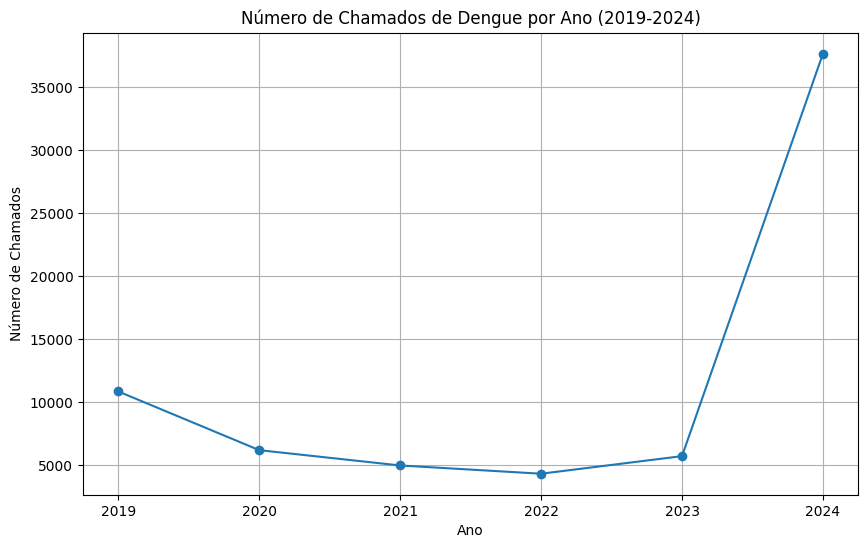

In [4]:
# Extrair o ano e a semana do ano de cada data
dengue_df['Ano'] = dengue_df['Data de cadastro'].dt.year
dengue_df['Semana'] = dengue_df['Data de cadastro'].dt.isocalendar().week

# Filtrar os dados para o período de 2019 a 2024
data_2019_2024 = dengue_df[dengue_df['Ano'] <= 2024]

# Contar o número de chamados por ano
calls_by_year = data_2019_2024.groupby('Ano').size()

# Plotar o gráfico de linha para os anos de 2019 a 2024
plt.figure(figsize=(10, 6))
plt.plot(calls_by_year.index, calls_by_year.values, marker='o', linestyle='-')
plt.title('Número de Chamados de Dengue por Ano (2019-2024)')
plt.xlabel('Ano')
plt.ylabel('Número de Chamados')
plt.grid(True)
plt.show()


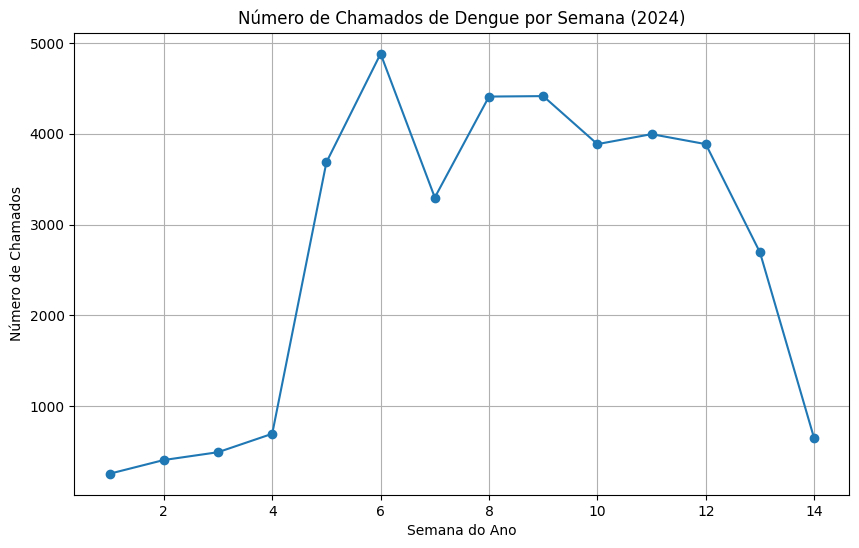

In [5]:
# Filtrar os dados para o ano de 2024
data_2024 = dengue_df[dengue_df['Ano'] == 2024]

# Contar o número de chamados por semana em 2024
calls_by_week_2024 = data_2024.groupby('Semana').size()

# Plotar o gráfico de linha para o ano de 2024 por semanas
plt.figure(figsize=(10, 6))
plt.plot(calls_by_week_2024.index, calls_by_week_2024.values, marker='o', linestyle='-')
plt.title('Número de Chamados de Dengue por Semana (2024)')
plt.xlabel('Semana do Ano')
plt.ylabel('Número de Chamados')
plt.grid(True)
plt.show()


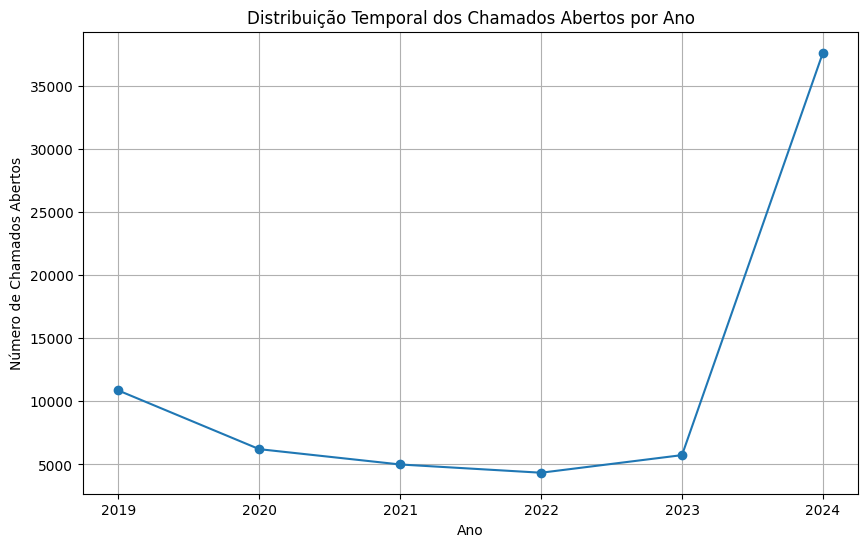

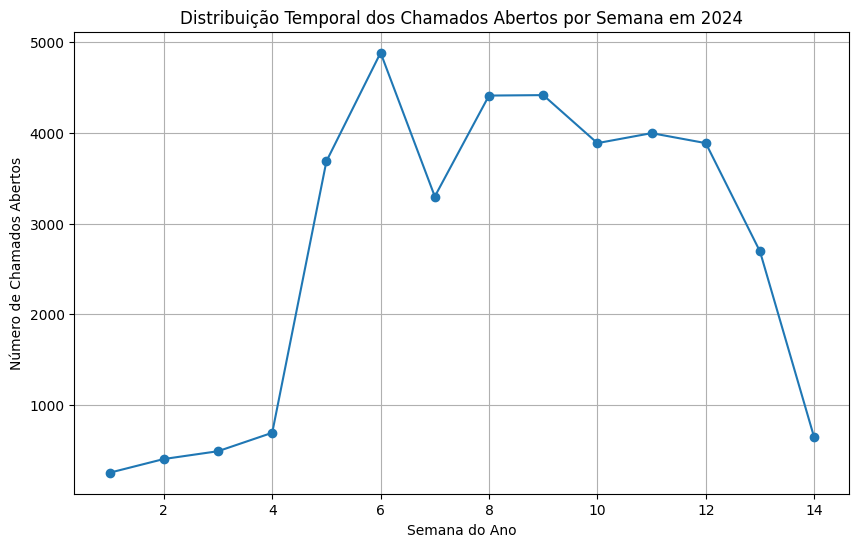

In [6]:
# Converter a coluna 'Data de cadastro' para o tipo datetime
dengue_df['Data de cadastro'] = pd.to_datetime(dengue_df['Data de cadastro'])

# Extrair o ano e a semana do ano para os dados de 2024
dengue_df['Ano'] = dengue_df['Data de cadastro'].dt.year
dengue_df['Semana'] = dengue_df['Data de cadastro'].dt.isocalendar().week

# Filtrar os dados para o ano de 2024
dengue_2024_df = dengue_df[dengue_df['Ano'] == 2024]

# Contar o número de chamados abertos por ano
calls_by_year = dengue_df.groupby(dengue_df['Data de cadastro'].dt.year).size()

# Contar o número de chamados abertos por semana em 2024
calls_by_week_2024 = dengue_2024_df.groupby('Semana').size()

# Plotar o gráfico de linha para distribuição temporal dos chamados por ano
plt.figure(figsize=(10, 6))
plt.plot(calls_by_year.index, calls_by_year.values, marker='o', linestyle='-')
plt.title('Distribuição Temporal dos Chamados Abertos por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Chamados Abertos')
plt.grid(True)
plt.show()

# Plotar o gráfico de linha para distribuição temporal dos chamados por semana em 2024
plt.figure(figsize=(10, 6))
plt.plot(calls_by_week_2024.index, calls_by_week_2024.values, marker='o', linestyle='-')
plt.title('Distribuição Temporal dos Chamados Abertos por Semana em 2024')
plt.xlabel('Semana do Ano')
plt.ylabel('Número de Chamados Abertos')
plt.grid(True)
plt.show()


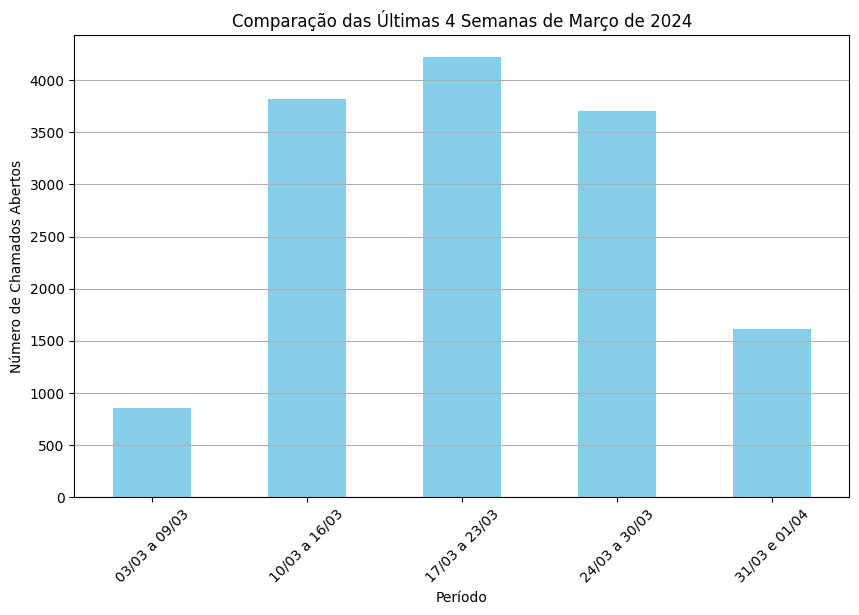

In [7]:
# Definir os rótulos para as últimas 4 semanas de março de 2024
week_labels = ['03/03 a 09/03', '10/03 a 16/03', '17/03 a 23/03', '24/03 a 30/03' , '31/03 e 01/04']

# Filtrar os chamados das últimas 4 semanas de março de 2024
last_4_weeks_march_2024 = dengue_df[(dengue_df['Data de cadastro'] >= '2024-03-03') & (dengue_df['Data de cadastro'] <= '2024-03-30')]

# Contar o número de chamados abertos por semana
calls_by_week = last_4_weeks_march_2024.groupby(pd.Grouper(key='Data de cadastro', freq='W-MON')).size()

# Plotar o gráfico de barras para a comparação das últimas 4 semanas de março de 2024
plt.figure(figsize=(10, 6))
calls_by_week.plot(kind='bar', color='skyblue')
plt.title('Comparação das Últimas 4 Semanas de Março de 2024')
plt.xlabel('Período')
plt.ylabel('Número de Chamados Abertos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.xticks(range(len(week_labels)), week_labels)
plt.show()
